In [38]:
import numpy as np
import pandas as pd 
%matplotlib inline
from PIL import Image
import os

In [39]:
train_df= pd.read_csv("train.csv")
train_df.head()



,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [40]:
train_df['has_cactus'].value_counts()

1    13136
0     4364
Name: has_cactus, dtype: int64

In [41]:
train_df.shape

(17500, 2)

In [51]:
def load_data(df):
    #Return a new array of given shape and type, without initializing entries.
    data = np.empty((17500,32,32,3),dtype='float32')    
    label = np.empty((17500,),dtype='uint8')
    img_dir = "C:/Users/mac/Desktop/ml-project/train/"
    fold_name = "train"
    imgs = os.listdir(img_dir+fold_name)
    imgs.sort()
    num = len(imgs)
    for i in range(num):
        img = Image.open(img_dir+fold_name+"/"+imgs[i])
        arr = np.asarray(img,dtype='float32')
        data[i,:,:,:] = arr
        label[i] = int(df.iloc[i]['has_cactus'])
    return data, label



In [52]:
train_x, train_y = load_data(train_df)

In [53]:
train_x = train_x.reshape(17500,32*32*3) 

In [54]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(train_x)

array([[0.5277778 , 0.5411765 , 0.4901961 , ..., 0.53968257, 0.43307087,
        0.50980395],
       [0.45634922, 0.427451  , 0.44705886, ..., 0.48809522, 0.43307087,
        0.47450984],
       [0.6150794 , 0.54509807, 0.61960787, ..., 0.59126985, 0.496063  ,
        0.5294118 ],
       ...,
       [0.38492066, 0.35686275, 0.37647063, ..., 0.43650794, 0.4094488 ,
        0.41176474],
       [0.56746036, 0.5137255 , 0.5254902 , ..., 0.56349206, 0.511811  ,
        0.52156866],
       [0.68650794, 0.5803922 , 0.6392157 , ..., 0.35714287, 0.38582677,
        0.36078432]], dtype=float32)

In [55]:
train_x = train_x.reshape(17500,32,32,3) 

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(train_x, train_y, test_size=0.1, random_state=42)

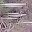

In [27]:

import os
Image(os.path.join("C:\\Users\\mac\\Desktop\\ml-project\\train\\train",train_df.iloc[0][0]),width =200,height =300)

In [58]:
from keras.applications import VGG16


In [59]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
vgg = VGG16(weights='imagenet',include_top=False,input_shape=(32,32,3))
vgg.trainable = False
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [60]:
model = Sequential()
model.add(vgg) # to load the pre trained model
model.add(Flatten())# to convert two dimensional array into a vector
model.add(Dense(256))# a fully connected layer
model.add(Activation('relu'))
model.add(Dropout(0.5)) # helps in removing the overfitting from the layer to make it more generalized
model.add(Dense(1)) #fully connected layer which gives a single output
model.add(Activation('sigmoid')) # activation functio for making a decision
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_3 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
_________________________________________________________________
activation_4 (Activation)    (None, 1)                

In [65]:
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])
#optimizer:deciding the weights for the network

In [66]:

history = model.fit(x_train, y_train,batch_size=32,epochs=10,validation_split=0.1,shuffle=True,verbose=2)


Train on 14175 samples, validate on 1575 samples
Epoch 1/10
 - 129s - loss: 0.4899 - accuracy: 0.9429 - val_loss: 0.1095 - val_accuracy: 0.9638
Epoch 2/10
 - 113s - loss: 0.2118 - accuracy: 0.9474 - val_loss: 0.1560 - val_accuracy: 0.9625
Epoch 3/10
 - 110s - loss: 0.2151 - accuracy: 0.9389 - val_loss: 0.1899 - val_accuracy: 0.9638
Epoch 4/10
 - 120s - loss: 0.1713 - accuracy: 0.9431 - val_loss: 0.1681 - val_accuracy: 0.9663
Epoch 5/10
 - 114s - loss: 0.1925 - accuracy: 0.9342 - val_loss: 0.1935 - val_accuracy: 0.9606
Epoch 6/10
 - 111s - loss: 0.1983 - accuracy: 0.9314 - val_loss: 0.1247 - val_accuracy: 0.9600
Epoch 7/10
 - 116s - loss: 0.2112 - accuracy: 0.9387 - val_loss: 0.1038 - val_accuracy: 0.9651
Epoch 8/10
 - 112s - loss: 0.2237 - accuracy: 0.9122 - val_loss: 0.1652 - val_accuracy: 0.9638
Epoch 9/10
 - 112s - loss: 0.1617 - accuracy: 0.9394 - val_loss: 0.2632 - val_accuracy: 0.9638
Epoch 10/10
 - 117s - loss: 0.1390 - accuracy: 0.9435 - val_loss: 0.1382 - val_accuracy: 0.9632


In [99]:
score = model.evaluate(x_valid, y_valid, verbose=0)
print("loss:",score[0])
print("accu:",score[1])

loss: 0.08911195290940148
accu: 0.9702857136726379


In [76]:
test = np.empty((17500,32,32,3),dtype='float32')    
img_dir = "C:/Users/mac/Desktop/ml-project/test/"
fold_name = "test"
Test_imgs =[]
imgs = os.listdir(img_dir+fold_name)
imgs.sort()
num = len(imgs)
for i in range(num):
    img = Image.open(img_dir+fold_name+"/"+imgs[i])
    arr = np.asarray(img,dtype='float32')
    test[i,:,:,:] = arr
    Test_imgs.append(i)
    
test /=255

In [77]:
predictions =  model.predict(test)

In [97]:
final_df = pd.DataFrame(predictions, columns=['has_cactus']) 
#Assigning 1 to values greater than 0.75 or else 0 best on the prediction made
final_df['has_cactus'] = final_df['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)
final_df.head()                  


,has_cactus
0,1
1,1
2,0
3,1
4,1


In [98]:
final_df.to_csv('VGG16.csv',index=False)